In [108]:
'''
s - number of susceptible indiv
i - number of infected indiv
r - removed population, no longer sick
N - total population
N = s + i + r
beta - scale factor, how likely infected person make susceptible person sick
gamma - measure rate at which infected indiv removed
'''

'\ns - number of susceptible indiv\ni - number of infected indiv\nr - removed population, no longer sick\nN - total population\nN = s + i + r\nbeta - scale factor, how likely infected person make susceptible person sick\ngamma - measure rate at which infected indiv removed\n'

In [109]:
import numpy as np

In [129]:
def explicitEuler(s, i, r, beta, gamma, N, timestep):
    dsdt = -beta/N * s * i
    didt = beta/N * s * i - gamma * i
    drdt = gamma * i
    s_updated = s + dsdt * timestep
    i_updated = i + didt * timestep
    r_updated = r + drdt * timestep
    return s_updated, i_updated, r_updated

In [130]:
s_values = []
i_values = []
r_values = []

def SIR(beta, gamma, timestep, Tmax, infected, N, s, i, r):
    peak_day = 0
    sick_prev = 1
    s_values.append(N - infected)
    i_values.append(infected)
    r_values.append(0)

    for j in range(Tmax):
        s_updated, i_updated, r_updated = explicitEuler(s_values[j], i_values[j], r_values[j], beta, gamma, N, timestep)
        s_values.append(s_updated)
        i_values.append(i_updated)
        r_values.append(r_updated)

        if i_updated > sick_prev:
            sick_prev = i_updated
            peak_day = j
            
    print("The disease cases peaks on day", peak_day + 1, "at a case number of", sick_prev, "people")
    
    return s_values, i_values, r_values, peak_day, sick_prev

The disease cases peaks on day 16 at a case number of 26033.39152123727 people


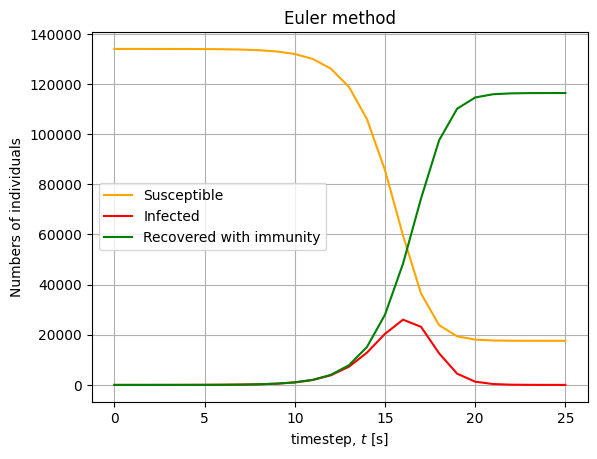

In [131]:
import matplotlib.pyplot as plt

SIR(2, 1, 1, 25, 1, 134000, 133999, 1, 0)
plt.figure()
plt.title("Euler method")
plt.plot(s_values, color = 'orange', label='Susceptible')
plt.plot(i_values, 'r', label='Infected')
plt.plot(r_values, 'g', label='Recovered with immunity')
plt.grid()
plt.xlabel("timestep, $t$ [s]")
plt.ylabel("Numbers of individuals")
plt.legend(loc = "best")
plt.show()



In [157]:
x = 2
y = 1
day_peak = np.empty((20, 20), int)
indiv_peak = np.empty((20, 20), int)

for i in range(20):
    for j in range(20):
        a, b, c, d, e = SIR(i, j, 1, 20, 1, 134000, 133999, 1, 0)
        day_peak[i][j] = d + 1
        indiv_peak[i][j] = e


The disease cases peaks on day 17 at a case number of 26033.39152123727 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 1 people
The disease cases peaks on day 1 at a case number of 

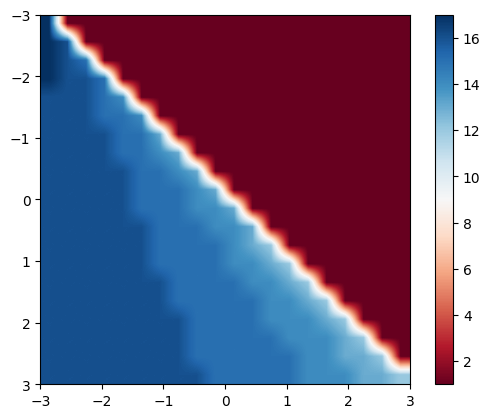

In [158]:
import numpy as np
import matplotlib.pyplot as plt

im = plt.imshow(day_peak, cmap=plt.cm.RdBu, extent=(-3, 3, 3, -3), interpolation='bilinear')
plt.colorbar(im)
plt.show()

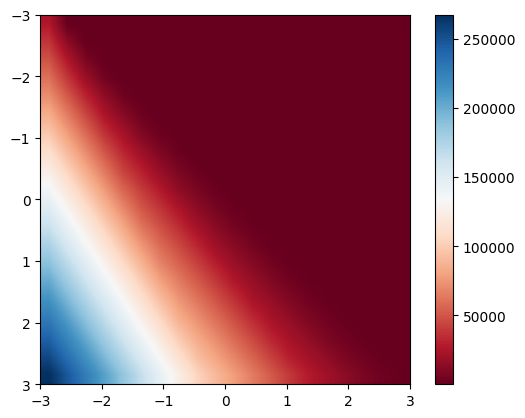

In [159]:
im = plt.imshow(indiv_peak, cmap=plt.cm.RdBu, extent=(-3, 3, 3, -3), interpolation='bilinear')
plt.colorbar(im)
plt.show()